In [1]:
%matplotlib inline
from __future__ import print_function

import sys
from operator import add
import os

from pyspark.sql import SparkSession


if __name__ == "__main__":
    spark = SparkSession\
        .builder\
        .appName("PythonWordCount")\
        .getOrCreate()

    # textfile = spark.read.text("data/comptagevelo2009.csv")
    df = spark.read.csv("data/tpsgc-pwgsc_co-ch_tous-all.csv", header=True)
    print(df.show())
  

+--------------------+----------------+----------+-----------+--------------+------+--------------------+--------------------+---------------------+---------------------+---------------------+------------------------------------+------------------------------------+----------------------+-------------------------------------+-------------------------------------+---------------+------------------------------+------------------------------+--------------------------+-----------------------+--------------------+---------------------+---------------------------+----------------------------+------------------------+------------------------------+------------------------------+--------------------+--------------+--------------------+--------------------+---------------------------------+---------------------------------+----------------------------+----------------------------+------------------------+------------------------------+-------------------------------+---------------------------

In [2]:
print(df.columns)

['contract-number', 'amendment-number', 'award-date', 'expiry-date', 'contract-value', 'gsin', 'gsin-description_en', 'gsin-description_fr', 'competitive-tender_en', 'competitive-tender_fr', 'limited-tender-reason', 'limited-tender-reason-description_en', 'limited-tender-reason-description_fr', 'solicitation-procedure', 'solicitation-procedure-description_en', 'solicitation-procedure-description_fr', 'trade-agreement', 'trade-agreement-description_en', 'trade-agreement-description_fr', 'supplier-standardized-name', 'supplier-operating-name', 'supplier-legal-name', 'supplier-address-city', 'supplier-address-prov-state', 'supplier-address-postal-code', 'supplier-address-country', 'organization-employee-count_en', 'organization-employee-count_fr', 'total-contract-value', 'number-records', 'end-user-entity_en', 'end-user-entity_fr', 'contracting-entity-office-name_en', 'contracting-entity-office-name_fr', 'contracting-address-street-1', 'contracting-address-street-2', 'contracting-address-

In [3]:
supplier = df.select("supplier-standardized-name","supplier-address-postal-code")



In [4]:
supplier.show()

+--------------------------+----------------------------+
|supplier-standardized-name|supplier-address-postal-code|
+--------------------------+----------------------------+
|       ABCO INDUSTRIES LTD|                      B0J2C0|
|       ABCO INDUSTRIES LTD|                      B0J2C0|
|       ABCO INDUSTRIES LTD|                      B0J2C0|
|      BEST WESTERN PLUS...|                      V6X1S1|
|      BEST WESTERN PLUS...|                      V6X1S1|
|      BEST WESTERN PLUS...|                      V6X1S1|
|      AIR NORTH YUKONS ...|                      Y1A6E6|
|      AIR NORTH YUKONS ...|                      Y1A6E6|
|      AIR NORTH YUKONS ...|                      Y1A6E6|
|      FLOATATION TECHNO...|                       04005|
|      FLOATATION TECHNO...|                       04005|
|      ADVANCED ENERGY M...|                      E1E4C7|
|      SAE INTERNATIONAL...|                  15096-0001|
|          ACL SERVICES LTD|                      V6G1A5|
|          ACL

In [5]:
supplier.summary().show()

+-------+--------------------------+----------------------------+
|summary|supplier-standardized-name|supplier-address-postal-code|
+-------+--------------------------+----------------------------+
|  count|                    358666|                      358666|
|   mean|      3.8976099333333336E7|        1.2138194957020719E7|
| stddev|        6.75051791142971E7|        1.1108794390073177E8|
|    min|       (DBA) J CHADWICK CO|                      00-132|
|    25%|                    1966.0|                     21090.0|
|    50%|                    1966.0|                     52532.0|
|    75%|              1.16924366E8|                     89511.0|
|    max|      ÆSIR INTERNATIONA...|                      r3c4w7|
+-------+--------------------------+----------------------------+



In [6]:
gdf_postal_code = supplier.groupBy("supplier-address-postal-code")
group_by_postal_code = sorted(gdf_postal_code.count().collect())

In [30]:
supplier_pandas = supplier.toPandas()
supplier_sampled = spark.createDataFrame(supplier.head(1000), schema=supplier.schema).toPandas()


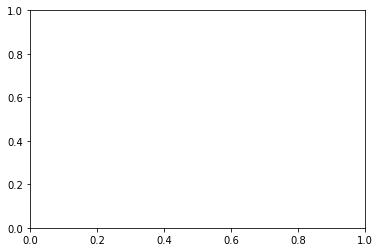

In [18]:
 fig, ax = plt.subplots(1, 1)

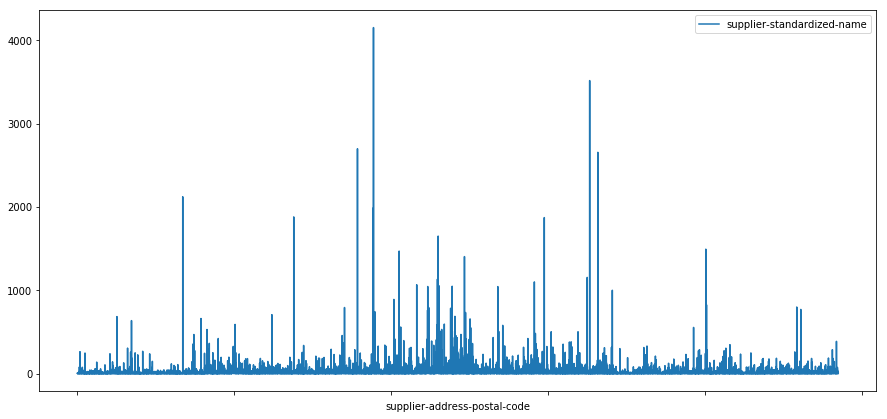

In [29]:
fig, ax = plt.subplots(figsize=(15,7))
supplier_pandas.groupby(['supplier-address-postal-code']).count().plot(ax=ax,)